<font face="Times New Roman">

# Plot computer-generated phase portraits of the following systems.

In [1]:
from matplotlib.path import Path
import matplotlib.pyplot as plt
from itertools import product
from matplotlib import cm
import numpy as np
import warnings

plt.rc('font',family='Times New Roman')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

verts = np.concatenate([Path.arc(theta1=0, theta2=180, n=10).vertices,
                        np.array([(0, 0), (0, -1)])])
codes = np.concatenate([Path.arc(theta1=0, theta2=180, n=10).codes,
                       [Path.LINETO, Path.CLOSEPOLY]])
marker = Path(verts, codes)

<font face="Times New Roman">

## van der Pol oscillator

$$
\begin{array}{l}
	\dot{x}=y\\
	\dot{y}=-x+y\left( 1-x^2 \right)\\
\end{array}
$$

Fixed points: $(0,0)$

In [2]:
points = product(np.arange(-4, 4, 0.1), np.arange(-4, 4, 0.1))
points = np.array(list(points))

dxArray = points[:, 1]
dyArray = -points[:, 0] + points[:, 1] * (1 - points[:, 0] ** 2)
vectors = np.array([dxArray, dyArray]).T / 100

def get_trajectories(x0, y0, dt=0.1, iterations=100):
    x, y = [x0], [y0]
    for _ in range(iterations):
        xi, yi = x[-1], y[-1]
        dx = yi
        dy = -xi + yi * (1 - xi ** 2)
        x.append(xi + dx * dt)
        y.append(yi + dy * dt)
    return x, y

In [3]:
plt.figure(figsize=(7, 7))
plt.scatter(points[:, 0], points[:, 1], s=1)
plt.scatter(0, 0, s=100, marker='.', facecolors='white', edgecolors='black', zorder=10)

angles = np.arctan2(vectors[:, 1], vectors[:, 0])
colors = cm.hsv(angles / (2 * np.pi))
plt.quiver(
    points[:, 0], points[:, 1], 
    vectors[:, 0], vectors[:, 1], 
    angles='xy', scale_units='xy', 
    scale=0.2, 
    color=colors
)

for x0, y0 in [[0.01, 0.01], [-0.01, -0.01]]:
    x, y = get_trajectories(x0, y0, iterations=200)
    plt.plot(x, y, color='black', linewidth=1)
    location = 90
    plt.quiver(x[location], y[location], 
               np.diff(x)[location], np.diff(y)[location], 
               angles='xy', scale_units='xy', scale=1, color='black')

plt.xlim(-2.5, 2.5)
plt.ylim(-3, 3)
plt.show()

<font face="Times New Roman">

## Dipole fixed point

$$
\begin{array}{l}
	\dot{x}=2xy\\
	\dot{y}=y^2-x^2\\
\end{array}
$$

Fixed points: $(0,0)$

In [4]:
points = product(np.arange(-2, 2, 0.1), np.arange(-2, 2, 0.1))
points = np.array(list(points))

dxArray = 2 * points[:, 0] * points[:, 1]
dyArray = points[:, 1] ** 2 - points[:, 0] ** 2 
vectors = np.array([dxArray, dyArray]).T / 100

def get_trajectories(x0, y0, dt=0.1, iterations=100):
    x, y = [x0], [y0]
    for _ in range(iterations):
        xi, yi = x[-1], y[-1]
        dx = 2 * xi * yi
        dy = yi ** 2 - xi ** 2
        x.append(xi + dx * dt)
        y.append(yi + dy * dt)
    return x, y

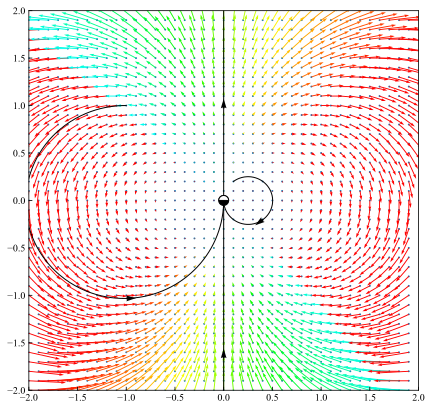

In [5]:
plt.figure(figsize=(7, 7))
plt.scatter(points[:, 0], points[:, 1], s=1)

plt.scatter(0, 0, s=100, marker='o', facecolors='black', edgecolors='black', zorder=9)
plt.scatter(0, 0, s=100, marker=marker, facecolors='white', edgecolors='black', zorder=10)

angles = np.arctan2(vectors[:, 1], vectors[:, 0])
colors = cm.hsv(angles / (2 * np.pi))
plt.quiver(
    points[:, 0], points[:, 1], 
    vectors[:, 0], vectors[:, 1], 
    angles='xy', scale_units='xy', 
    scale=0.2, 
    color=colors
)

for x0, y0, location in [[-1, 1, 100], [0, -2, 10], [0, 0.05, 1900], [0.1, 0.2, 500]]:
    x, y = get_trajectories(x0, y0, dt=0.01 ,iterations=2000)
    plt.plot(x, y, color='black', linewidth=1)
    vx, vy = np.diff(x)[location], np.diff(y)[location]
    length = np.sqrt(vx ** 2 + vy ** 2) * 10
    plt.quiver(x[location], y[location], 
               vx / length, vy / length, 
               angles='xy', scale_units='xy', scale=1, color='black')

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

<font face="Times New Roman">

## Two-eyed monster

$$
\begin{array}{l}
	\dot{x}=y+y^2\\
	\dot{y}=-\frac{1}{2}x+\frac{1}{5}y-xy+\frac{6}{5}y^2\\
\end{array}
$$

Fixed points: $(0,0)$, $(-2, -1)$

In [6]:
points = product(np.arange(-6, 4, 0.1), np.arange(-5, 5, 0.1))
points = np.array(list(points))

dxArray = points[:, 1] + points[:, 1] ** 2
dyArray = -points[:, 0] / 2 + points[:, 1] / 5 - points[:, 0] * points[:, 1] + 6 / 5 * points[:, 1] ** 2
vectors = np.array([dxArray, dyArray]).T / 70

def get_trajectories(x0, y0, dt=0.1, iterations=100):
    x, y = [x0], [y0]
    for _ in range(iterations):
        xi, yi = x[-1], y[-1]
        dx = yi + yi ** 2
        dy = -xi / 2 + yi / 5 - xi * yi + 6 / 5 * yi ** 2
        x.append(xi + dx * dt)
        y.append(yi + dy * dt)
    return x, y

In [7]:
plt.figure(figsize=(7, 7))
plt.scatter(points[:, 0], points[:, 1], s=1)

plt.scatter(0, 0, s=20, marker='o', facecolors='white', edgecolors='black', zorder=10)
plt.scatter(-2, -1, s=20, marker='o', facecolors='black', edgecolors='black', zorder=9)

angles = np.arctan2(vectors[:, 1], vectors[:, 0])
colors = cm.hsv(angles / (2 * np.pi))
plt.quiver(
    points[:, 0], points[:, 1], 
    vectors[:, 0], vectors[:, 1], 
    angles='xy', scale_units='xy', 
    scale=0.2, 
    color=colors
)

for x0, y0, location in [[0.01, 0.01, 2000], [-3, -1, 100], [-3, -0.5, 100],
                         [-6, -5, 50], [-5, -5, 50], [-4, -5, 50], [-3, -5, 50], [-2, -5, 50], 
                         [-6, -1, 50], [-5, -1, 50], [-4, -1, 50], [-3, -1, 50], [-2, -1, 50], 
                         [-6, -0.5, 50], [-5, -0.5, 50], [-4, -0.5, 50], [-3, -0.5, 50], [-2, -0.5, 50], 
                         [-1, -5, 50], [0, -5, 50], [1, -5, 50], [2, -5, 50], [3, -5, 50],
                         [-6, -4, 50], [-6, -3, 50], [-6, -3, 50], [-6, -2, 50], [-6, -1, 50], 
                         [-6, 0, 50], [-6, 1, 50], [-6, 2, 50], [-6, 4, 50]]:
    x, y = get_trajectories(x0, y0, dt=0.01 ,iterations=10000)
    plt.plot(x, y, color='black', linewidth=1)
    vx, vy = np.diff(x)[location], np.diff(y)[location]
    length = np.sqrt(vx ** 2 + vy ** 2) * 10
    plt.quiver(x[location], y[location], 
               vx / length, vy / length, 
               angles='xy', scale_units='xy', scale=1, color='black')

plt.xlim(-6, 4)
plt.ylim(-5, 5)
plt.show()

<font face="Times New Roman">

## Parrot

$$
\begin{array}{l}
	\dot{x}=y+y^2\\
	\dot{y}=-x+\frac{1}{5}y-xy+\frac{6}{5}y^2\\
\end{array}
$$

Fixed points: $(0,0)$

In [8]:
points = product(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
points = np.array(list(points))

dxArray = points[:, 1] + points[:, 1] ** 2
dyArray = -points[:, 0] + points[:, 1] / 5 - points[:, 0] * points[:, 1] + 6 / 5 * points[:, 1] ** 2
vectors = np.array([dxArray, dyArray]).T / 50

def get_trajectories(x0, y0, dt=0.1, iterations=100):
    x, y = [x0], [y0]
    for _ in range(iterations):
        xi, yi = x[-1], y[-1]
        dx = yi + yi ** 2
        dy = -xi + yi / 5 - xi * yi + 6 / 5 * yi ** 2
        x.append(xi + dx * dt)
        y.append(yi + dy * dt)
    return x, y

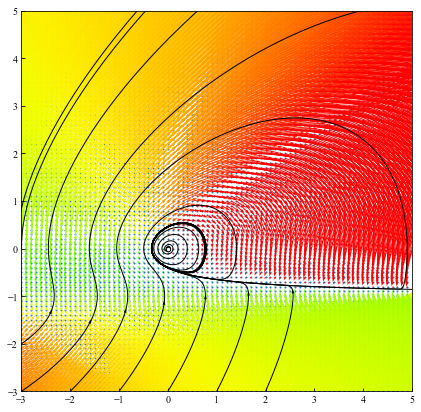

In [9]:
plt.figure(figsize=(7, 7))
plt.scatter(points[:, 0], points[:, 1], s=1)

plt.scatter(0, 0, s=20, marker='o', facecolors='white', edgecolors='black', zorder=10)
# plt.scatter(-2, -1, s=20, marker='o', facecolors='black', edgecolors='black', zorder=9)

angles = np.arctan2(vectors[:, 1], vectors[:, 0])
colors = cm.hsv(angles / (2 * np.pi))
plt.quiver(
    points[:, 0], points[:, 1], 
    vectors[:, 0], vectors[:, 1], 
    angles='xy', scale_units='xy', 
    scale=0.2, 
    color=colors
)

for x0, y0, location in [[-3, -3, 50], [-3, -2, 50], [-3, -1, 50], [-3, 0, 50],
                         [-2, -3, 50], [-1, -3, 50], [0, -3, 50], [1, -3, 50],
                         [2, -3, 50], [0.01, -0.01, 50], ]:
    x, y = get_trajectories(x0, y0, dt=0.01 ,iterations=10000)
    plt.plot(x, y, color='black', linewidth=1)
    vx, vy = np.diff(x)[location], np.diff(y)[location]
    length = np.sqrt(vx ** 2 + vy ** 2) * 10
    plt.quiver(x[location], y[location], 
               vx / length, vy / length, 
               angles='xy', scale_units='xy', scale=1, color='black')

plt.xlim(-3, 5)
plt.ylim(-3, 5)
plt.show()